<a href="https://colab.research.google.com/github/vivekbhoj007/Age_Gender_Prediction/blob/master/Age_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

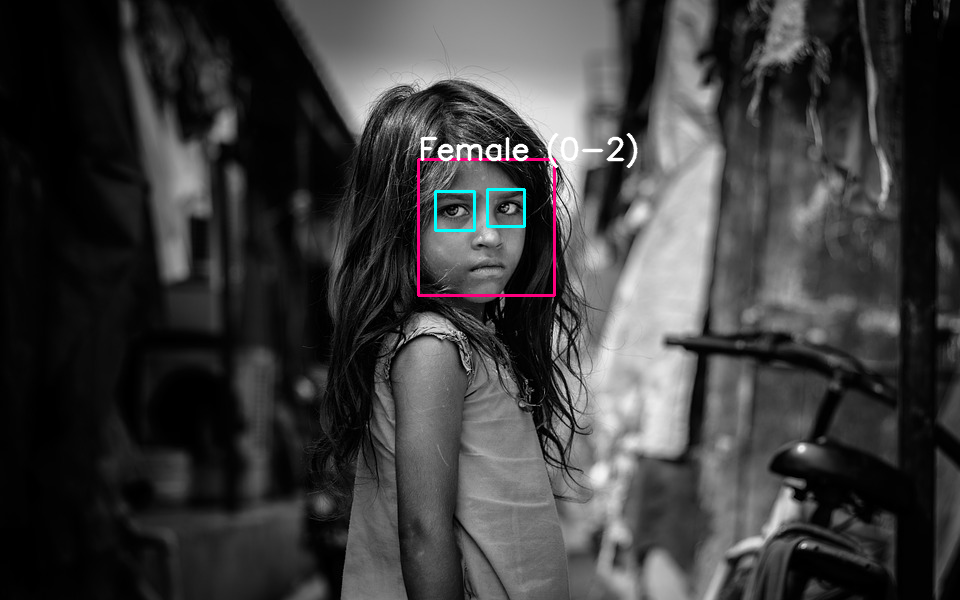

In [0]:
import cv2
import os
import argparse
import numpy as np
from google.colab.patches import cv2_imshow

face_classifier = cv2.CascadeClassifier("/content/drive/My Drive/Deep Learning/CNN/Computer-Vision-Tutorial-master/Haarcascades/haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier("/content/drive/My Drive/Deep Learning/CNN/Computer-Vision-Tutorial-master/Haarcascades/haarcascade_eye.xml")

# loading the image
# image = cv2.imread("/content/drive/My Drive/Deep Learning/CNN/Face_Reconization/Test/bhondu/bhondu.jpg")
image = cv2.imread("/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/girl2.jpg")
# image = cv2.imread("/content/drive/My Drive/Deep Learning/CNN/Age_Classification/brothers.jpg")



gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


# faceProto="opencv_face_detector.pbtxt"
# faceModel="opencv_face_detector_uint8.pb"
# ageProto="age_deploy.prototxt"
# ageModel="age_net.caffemodel"
# genderProto="gender_deploy.prototxt"
# genderModel="gender_net.caffemodel"

faceProto="/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/opencv_face_detector.pbtxt"
faceModel="/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/opencv_face_detector_uint8.pb"
ageProto="/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/age_deploy.prototxt"
ageModel="/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/age_net.caffemodel"
genderProto="/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/gender_deploy.prototxt"
genderModel="/content/drive/My Drive/Deep Learning/CNN/Age_Classification/gad/gender_net.caffemodel"


MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

# faceNet=cv2.dnn.readNet(faceModel,faceProto)
# ageNet=cv2.dnn.readNet(ageModel,ageProto)
# genderNet=cv2.dnn.readNet(genderModel,genderProto)

faceNet=cv2.dnn.readNetFromCaffe(faceProto,faceModel)
ageNet=cv2.dnn.readNetFromCaffe(ageProto,ageModel)
genderNet=cv2.dnn.readNetFromCaffe(genderProto,genderModel)

# readNetFromCaffe


# detecting the face
faces = face_classifier.detectMultiScale(gray,1.3,5)

if faces is ():
  print("No faces found")

else :
  for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)
    # cv2_imshow(image)
    cv2.waitKey()
    roi_gray = gray[y:y+h, x:x+w]
    roi_colr = image[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_colr, (ex,ey), (ex+ew,ey+eh), (255,255,0),2)
      # cv2_imshow(image)
      cv2.waitKey()

      blob=cv2.dnn.blobFromImage(roi_colr, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
      genderNet.setInput(blob)
      genderPreds=genderNet.forward()
      gender=genderList[genderPreds[0].argmax()]
      # print(f'Gender: {gender}')

      ageNet.setInput(blob)
      agePreds=ageNet.forward()
      age=ageList[agePreds[0].argmax()]
      # print(f'Age: {age[1:-1]} years')
      # print("Age Range: " + age)


font = cv2.FONT_HERSHEY_SIMPLEX
overlay_text = "%s %s" % (gender, age)
cv2.putText(image, overlay_text, (x, y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

# print(f"Gender :{gender} and Age = {age}")
cv2_imshow(image)
# cv2.destroyAllWindows()

In [0]:
# Face Recognition

# Importing the libraries
import cv2

# Loading the cascades
face_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Deep Learning/CNN/Computer-Vision-Tutorial-master/Haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/drive/My Drive/Deep Learning/CNN/Computer-Vision-Tutorial-master/Haarcascades/haarcascade_eye.xml')

# Defining a function that will do the detections
def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    return frame

# Doing some Face Recognition with the webcam
video_capture = cv2.VideoCapture("/content/drive/My Drive/Rakshabandhan/VID-20190401-WA0048.mp4")
if (video_capture.isOpened() == False):
  print("Unable to read camera feed")
else:
  print("video is here")

while True:
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    # cv2.imshow('Video', canvas)
    # cv2_imshow(video_capture)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


video is here


In [0]:
import cv2
import math
import argparse

def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes


parser=argparse.ArgumentParser()
parser.add_argument('--image')

args=parser.parse_args()

faceProto="opencv_face_detector.pbtxt"
faceModel="opencv_face_detector_uint8.pb"
ageProto="age_deploy.prototxt"
ageModel="age_net.caffemodel"
genderProto="gender_deploy.prototxt"
genderModel="gender_net.caffemodel"

MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

video=cv2.VideoCapture(args.image if args.image else 0)
padding=20
while cv2.waitKey(1)<0:
    hasFrame,frame=video.read()
    if not hasFrame:
        cv2.waitKey()
        break

    resultImg,faceBoxes=highlightFace(faceNet,frame)
    if not faceBoxes:
        print("No face detected")

    for faceBox in faceBoxes:
        face=frame[max(0,faceBox[1]-padding):
                   min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                   :min(faceBox[2]+padding, frame.shape[1]-1)]

        blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds=genderNet.forward()
        gender=genderList[genderPreds[0].argmax()]
        print(f'Gender: {gender}')

        ageNet.setInput(blob)
        agePreds=ageNet.forward()
        age=ageList[agePreds[0].argmax()]
        print(f'Age: {age[1:-1]} years')

        cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
        cv2.imshow("Detecting age and gender", resultImg)


usage: ipykernel_launcher.py [-h] [--image IMAGE]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-12c78e89-b58d-49d4-93de-4db69ee35273.json


SystemExit: ignored

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
